# **TRABAJO PRÁCTICO FINAL**     

| Integrantes | Legajo|
|Boyé, Michel B-6609/5|

# Librerias

In [1]:
import csv
import math
import matplotlib
import matplotlib.pyplot
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

## Descarga

In [2]:
#!gdown  https://datos.yvera.gob.ar/dataset/09679fe3-7379-481d-a36a-6b1e3d7374b1/resource/9d4db872-0a51-4042-9daa-e55bc7a3044c/download/viajes_origen_destino_mes.csv

In [3]:
#!gdown 1WWvf6yn5oS1xarapKnwr3s8l2wKWtd7d

# Enunciado 1
- Leer el archivo 'coordenadas_provincias.csv' que se encuentra en esta dirección: \
  `
  https://drive.google.com/file/d/1WWvf6yn5oS1xarapKnwr3s8l2wKWtd7d/view?usp=drive_link
  `
- Crear la función listToDict que se encarga de convertir los datos leídos a una lista de diccionarios.
- Llamar a la función anterior con los datos del archivo leído y verificar que devuelva lo pedido.
- Crear el constructor de la clase 'Provincia'
- Crear un objeto de la clase 'Provincia'


In [4]:
def openFile():
  """
  Lee datos del archivo de entrada y retorna
  una lista con la información que se va a usar en el trabajo.
  """
  Lista_carga_Datos_CP = []
  with open('coordenadas_provincias.csv', 'r') as datos: 
      datos_csv = csv.reader(datos) #Se crea un objeto
      encabezado = next(datos_csv) #Salto la parte del encabezado
      for fila in datos_csv:
        Lista_carga_Datos_CP.append(fila)
  return Lista_carga_Datos_CP

In [5]:
def listToDict(lista: list):
    """
    Toma el resultado de la lectura de datos como argumento y devuelve una lista
    de diccionarios.
    Tiene un argumento 'encabezado' por defecto.
    La clave es el valor en el índice 0, y los valores asociados son una tupla
    con el resto de los elementos de la lista.
    """
    list_dic = []
    for fila in lista:
        dicProvincia = {fila[0]: tuple(fila[1:3])}
        list_dic.append(dicProvincia)
    return list_dic


Ejemplo de salida de la función `listToDict()`:

```python
provincias = [{'Buenos Aires':('-34.6037', '-58.3816')},
              {'CABA':('-34.6158', '-58.4333')}
              ...]
```



# Etapa 2: Continuamos la Carga de Datos

En esta etapa deberán:
● Leer el archivo que se encuentra en esta dirección:
https://datos.yvera.gob.ar/dataset/09679fe3-7379-481d-a36a-6b1e3d7374b1
/archivo/9d4db872-0a51-4042-9daa-e55bc7a3044c como 'previaje.csv'
● Crear el constructor de la clase 'Viaje'
● Cargar los datos del archivo en alguna estructura de datos que involucre
objetos de clase 'Viaje'

In [6]:
def Leer_Viajes():
    """
    Leo el archivo viajes_origen y almaceno las lineas enteras en la lista 
    hata terminar de leer todo el archivo, va a quedar una lista larga
    con todo el archivo almacenado.
    """
    Lista_viajes = []     
    with open('viajes_origen_destino_mes.csv', 'r') as previaje:
        previaje.csv = csv.reader(previaje) #Se crea un objeto
        encabezado = next(previaje.csv) #Salteo la primera linea que corresponde al encabezado
        for fila in previaje.csv:
            Lista_viajes.append(fila)
    return Lista_viajes

# Clases

## Clase Provincia

In [7]:
class Provincia:
  """
  Esta clase representa una provincia.
  Atributos:
    nombre: str
    coordenada: tuple
  """
  def __init__(self,nombre : str, coordenadas : tuple):
      self.nombre = nombre
      self.coordenadas = coordenadas

  def __str__(self):
      return f"Nombre de la provincia: {self.nombre}, Coordenadas: {self.coordenadas}"

# Clase Viaje

In [8]:
class Viaje:
    """
        Esta clase recibe una Lista como atributo y ejecuta un metodo 
        (carga_de_datos) que realiza la carga
    """
    def __init__(self, Lista):
        self.lista_viajes = self.carga_de_datos(Lista)

    def carga_de_datos(self, Lista):
        lista_viajes = []
        for fila in Lista:
            viaje = fila[0:6]
            lista_viajes.append(viaje)

        return lista_viajes


# Etapa 3: Análisis y Gráfico

En esta última etapa deberán:
● Usando la estructura de datos creada en la etapa 1, solicite al usuario que
ingrese dos provincias y calcule la distancia en línea recta entre ambas
● Usando la estructura de datos creada en la etapa 2, solicite al usuario que
ingrese dos provincias y cuente cuántos viajes se realizaron entre ambas en
cada edición del programa PreViaje, contando ambos sentidos de viajes.
● Realizar un gráfico de barra que muestre los valores calculados en el punto
anterior.

In [9]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Esta funcion recibe las latitudes y longitudes de las dos provincias
    seleccionadas por el usuario y aplica la formula de Haversine para calcular la dist.
    en linea recta de ambas prov.
    """
    R = 6371  # Radio de la Tierra en kilómetros
    
    # Utilizo math para convertir las latitudes y longitudes de grados a radianes
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # Calculo la diferencia de latitud y longitud
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    
    # Aplico la fórmula de Haversine
    a = math.sin(delta_lat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    
    return distance

#FONT: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [10]:
def dist_dos_prov(lista_CP):
    """
    Toma la estructura (Lista) de carga del archivo 'coordenadas_provincias.csv'
    Le pide al usuario que ingrese dos provincias, chequea si se encuentran en el 
    archivo y si estan almacena los datos en variables separadas para su posterior analisis
    """
    prov_1 = input("Ingrese la primera provincia: ")
    prov_2 = input("Ingrese la segunda provincia: ")
    for fila in lista_CP:
        if prov_1 == fila[0]:
            lat1 = float(fila[1])
            lon1 = float(fila[2])

        if prov_2 == fila[0]:
            lat2 = float(fila[1])
            lon2 = float(fila[2])
            
    return prov_1,prov_2,lat1, lon1, lat2, lon2


In [11]:
def dos_prov_cant_viajes_tot(Lista_viajes):
    '''
    Esta función solicita nuevamente al usuario que ingrese dos provincias
    y cuenta cuántos viajes se realizaron entre ambas en cada edición
    del programa PreViaje, contando ambos sentidos de viajes.
    '''
    print("Ingrese nuevamente dos provincias") 
    prov_1 = input("Ingrese la Provincia origen: ")
    prov_2 = input("Ingrese la Provincia destino: ")
    tot_viajes_ED1 = 0
    tot_viajes_ED2 = 0
    tot_viajes_ED3 = 0

    for fila in Lista_viajes:
        if (prov_1 in fila[1] or prov_2 in fila[1]) and 'previaje 1' == fila[5]:
            tot_viajes_ED1 += int(fila[3])

        elif (prov_1 in fila[1] or prov_2 in fila[1]) and 'previaje 2' == fila[5]:
            tot_viajes_ED2 += int(fila[3])

        elif (prov_1 in fila[1] or prov_2 in fila[1]) and 'previaje 3' == fila[5]:
            tot_viajes_ED3 += int(fila[3])
              
    return tot_viajes_ED1,tot_viajes_ED2,tot_viajes_ED3
    


In [12]:
def grafico_barra_seaborn(tot_ED1,tot_ED2,tot_ED3):
    """
        Gráfica con la libreria Seaborn
    """
    # Datos
    x = ["previaje 1", "previaje 2", "previaje 3"]
    y = [tot_ED1, tot_ED2, tot_ED3]

    # Gráfico de barras
    sns.barplot(x=x, y=y)
    plt.show()

In [13]:
def grafico_barra_matplotlib(tot_ED1,tot_ED2,tot_ED3):
    """
        Gráfica con la libreria Matplotlib
    """    
    # Datos
    x = ["previaje 1", "previaje 2", "previaje 3"]
    y = [tot_ED1, tot_ED2, tot_ED3]

    # GráficSo de barras
    fig, ax = plt.subplots() 

    ax.bar(x = x, height = y)
    plt.show()

# Programa principal

[['Buenos Aires', '-34.6037', '-58.3816'], ['Ciudad AutÃ³noma de Buenos Aires', '-34.6158', '-58.4333'], ['Catamarca', '-28.4696', '-65.7795'], ['Chaco', '-26.6021', '-59.3087'], ['Chubut', '-43.6848', '-68.2714'], ['CÃ³rdoba', '-31.4167', '-64.1833'], ['Corrientes', '-27.4692', '-58.8309'], ['Entre RÃ\xados', '-31.7642', '-60.5247'], ['Formosa', '-26.1844', '-58.1759'], ['Jujuy', '-24.1858', '-65.2995'], ['La Pampa', '-36.6167', '-64.2833'], ['La Rioja', '-29.4131', '-66.8558'], ['Mendoza', '-32.8908', '-68.8272'], ['Misiones', '-27.3621', '-55.9007'], ['NeuquÃ©n', '-38.9516', '-68.0591'], ['RÃ\xado Negro', '-40.8135', '-62.9967'], ['Salta', '-24.7829', '-65.4232'], ['San Juan', '-31.5375', '-68.5364'], ['San Luis', '-33.3335', '-66.3499'], ['Santa Cruz', '-51.6236', '-69.2169'], ['Santa Fe', '-31.6333', '-60.7'], ['Santiago del Estero', '-27.784', '-64.2665'], ['Tierra del Fuego, AntÃ¡rtida e Islas del AtlÃ¡ntico Sur', '-54.8019', '-68.302'], ['TucumÃ¡n', '-26.808', '-65.2176']]
[{'B

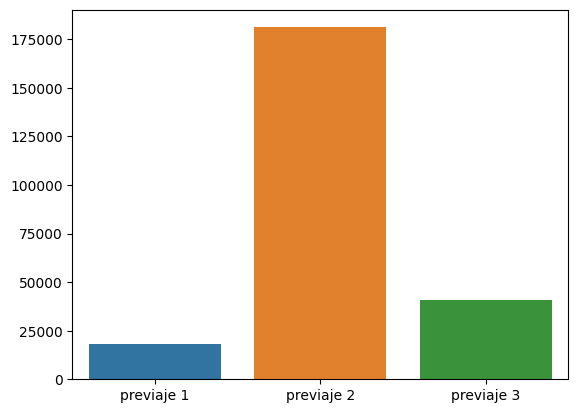

Gráfico con matplotlib


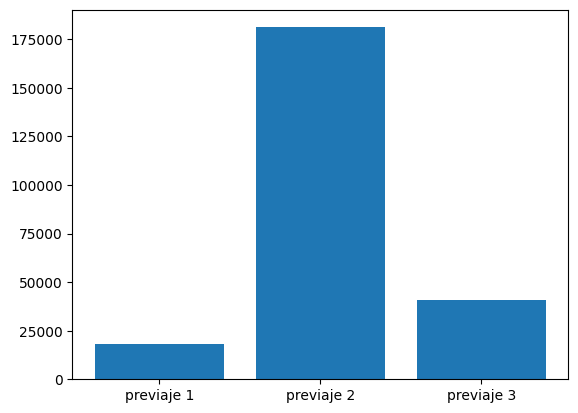

In [14]:
#---------------------------------------------------------------------
#Sector carga de datos
Lista_Cp = openFile()
print(Lista_Cp)
List_Dic_Cp = listToDict(Lista_Cp)
print(List_Dic_Cp)

Lista_viajes = Leer_Viajes()
print(Lista_viajes)

#---------------------------------------------------------------------
# Crear objeto Provincia 
tupla_lat_long_usr = (-54.8037,-18.3816) #Datos inventados
Prov_usr = "Conquista"
Devolucion_class_Provincia = Provincia(Prov_usr,tupla_lat_long_usr)
print(Devolucion_class_Provincia)
#---------------------------------------------------------------------
# Crear objeto Viaje y cargar datos desde la lista
Devolucion_class_Viajes = Viaje(Lista_viajes)
'''
# Mostrar a los datos cargados
for viaje in Devolucion_class_Viajes.lista_viajes:
    print(viaje)
'''
#---------------------------------------------------------------------
#Parte 3 (a)
prov_1,prov_2,lat1, lon1, lat2, lon2 = dist_dos_prov(Lista_Cp)
distancia = haversine(lat1,lon1,lat2,lon2)
print(f"La distancia en línea recta entre {prov_1} y {prov_2} es de:",distancia,"km") 

#Parte 3 (b)
tot_ED1,tot_ED2,tot_ED3 = dos_prov_cant_viajes_tot(Lista_viajes)
print(f" La cantidad de viajes de la ED 1 es: {tot_ED1},de la ED 2: {tot_ED2} y de la ED 3:{tot_ED3}")

#Parte 3(c)
print("")
print("Gráfico con seaborn")
Grapichs_seaborn = grafico_barra_seaborn(tot_ED1,tot_ED2,tot_ED3)

print("Gráfico con matplotlib")
Grapichs_matplotlib = grafico_barra_matplotlib(tot_ED1,tot_ED2,tot_ED3)